# Fed Rate Decision Based on Quant Econ Data

In [1]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [2]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = Path('fedecondata')

In [4]:
path.ls()

[PosixPath('fedecondata/feddata3.csv'),
 PosixPath('fedecondata/fdata.csv'),
 PosixPath('fedecondata/new1992.csv'),
 PosixPath('fedecondata/fdata6.csv'),
 PosixPath('fedecondata/fed1978v4.csv'),
 PosixPath('fedecondata/fed1978v2.csv'),
 PosixPath('fedecondata/.ipynb_checkpoints'),
 PosixPath('fedecondata/fed1978.csv'),
 PosixPath('fedecondata/fdata2.csv'),
 PosixPath('fedecondata/fedtest2.csv'),
 PosixPath('fedecondata/fdata5.csv'),
 PosixPath('fedecondata/models'),
 PosixPath('fedecondata/f1992.csv'),
 PosixPath('fedecondata/fdata4.csv'),
 PosixPath('fedecondata/fdata10.csv'),
 PosixPath('fedecondata/fdatanew.csv')]

In [5]:
df = pd.read_csv(path/'new1992.csv')

In [6]:
df.head()

date    cpi  inflation  inflationexpectations  employment  unemployment  \
0  1/1/92  138.3     68.667                    2.7      108372           7.3   
1  2/1/92  138.6     68.854                    2.6      108313           7.4   
2  3/1/92  139.1     69.026                    2.6      108368           7.4   
3  4/1/92  139.4     69.252                    3.0      108523           7.4   
4  5/1/92  139.7     69.350                    2.9      108652           7.6   

   participationrate  employmenttopopulationrate  parttimeworkers  \
0               66.3                        61.5             6593   
1               66.2                        61.3             6551   
2               66.4                        61.5             6531   
3               66.5                        61.6             6492   
4               66.6                        61.5             6550   

   joblessclaims    ...     jp_unemploymentrate  jp_manufacturing  \
0         439000    ...                     2.1              -3.8   
1         442200    ...                     2.0              -4.5   
2         429500    ...                     2.1              -5.4   
3         418250    ...                     2.1              -5.8   
4         417400    ...                     2.1              -9.1   

   jp_shortrates  jp_10yr  jp_servicespmi  jp_manufacturingpmi  uspmi  \
0           4.50    5.449             NaN                  NaN   47.3   
1           4.50    5.578             NaN                  NaN   52.7   
2           4.50    5.531             NaN                  NaN   54.6   
3           3.75    5.710             NaN                  NaN   52.6   
4           3.75    5.739             NaN                  NaN   55.7   

   euro_servicespmi  euro_manufacturingpmi  decision  
0               NaN                    NaN     lower  
1               NaN                    NaN     lower  
2               NaN                    NaN     lower  
3               NaN                    NaN     lower  
4               NaN                    NaN      hold  

[5 rows x 74 columns]

In [ ]:
# testrow = testdf.iloc[0]
# learn.predict(testrow)

### Classification

In [7]:
# predict decision
dep_var = 'decision'
cat_names = ['date']
cont_names = ['cpi','inflation','inflationexpectations','employment','unemployment','participationrate','employmenttopopulationrate','parttimeworkers','joblessclaims','industrialproduction','autoassemblies','ism','lightvehiclesales','consumersentiment','housingstartssingle','housingstartsmulti','buildingpermits','advanceretailsales','newhomesales','capitalgoodsshipments','capitalgoodsorders','constructionnonres','leadingindex','recessionprob','crudeoil','dollarindex','m1','2yearmaturity','aaacorpbondto10year','policyu','ltyield','vix','gold','baacorptotreas','90dayeurodollar','spreturn','libor','caseindex','m2','eurusd','eurgovtbondyields','tenyearthreemonth','monthstopotuselection','tedspread','nyfedrprob', 'exports', 'imports', 'oecdbizconditions', 'ger_ltyields', 'ger_3month', 'ger_unemp', 'ger_industrialprod', 'ger_neworders', 'ger_servicespmi', 'ger_manufacturingpmi', 'ch_industrialprod', 'ch_electric', 'ch_consumerconf', 'ch_compositepmi', 'ch_caixinpmi', 'jp_industrialprod', 'jp_neworders', 'jp_unemploymentrate', 'jp_manufacturing', 'jp_shortrates', 'jp_10yr', 'jp_servicespmi', 'jp_manufacturingpmi', 'uspmi', 'euro_servicespmi', 'euro_manufacturingpmi', 'rate']
procs = [FillMissing, Categorify, Normalize]

In [8]:
valid_idx = range(len(df)-90, len(df)-5)

In [9]:
valid_idx

range(240, 325)

In [10]:
test = TabularList.from_df(df.iloc[325:330].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [11]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [12]:
data.show_batch(rows=5)

In [16]:
learn = tabular_learner(data, layers=[400,100], metrics=accuracy, emb_drop=0.5)

In [17]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(246, 35)
    (1): Embedding(3, 3)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.5)
  (bn_cont): BatchNorm1d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=131, out_features=400, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=400, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [18]:
learn.fit(5, 1e-3, wd=0.1)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


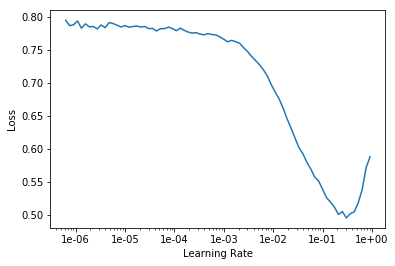

In [20]:
learn.recorder.plot()

In [21]:
learn.fit(5, slice(1e-2), wd=0.1)

In [22]:
learn.unfreeze()

In [24]:
learn.fit(5, slice(1e-2))

In [25]:
testrow = test[4]

In [26]:
learn.predict(testrow)

(Category lower, tensor(1), tensor([1.6744e-11, 1.0000e+00, 0.0000e+00]))

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [29]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
import numpy as np

In [31]:
features = pd.read_csv(path/'new1992rf.csv')

In [32]:
features2 = features.drop(['date'], axis=1)

In [33]:
features2.head()

cpi  inflation  inflationexpectations  employment  unemployment  \
0  138.3     68.667                    2.7      108372           7.3   
1  138.6     68.854                    2.6      108313           7.4   
2  139.1     69.026                    2.6      108368           7.4   
3  139.4     69.252                    3.0      108523           7.4   
4  139.7     69.350                    2.9      108652           7.6   

   participationrate  employmenttopopulationrate  parttimeworkers  \
0               66.3                        61.5             6593   
1               66.2                        61.3             6551   
2               66.4                        61.5             6531   
3               66.5                        61.6             6492   
4               66.6                        61.5             6550   

   joblessclaims  industrialproduction    ...     ch_electric  \
0         439000               63.3374    ...           57670   
1         442200               63.7911    ...           55150   
2         429500               64.3212    ...           61110   
3         418250               64.8088    ...           58730   
4         417400               65.0202    ...           62000   

   ch_consumerconf  jp_industrialprod  jp_neworders  jp_unemploymentrate  \
0            109.2               -2.5       1300.22                  2.1   
1            109.7               -3.9       1301.16                  2.0   
2            110.5               -4.4       1291.57                  2.1   
3            112.0               -5.3       1323.94                  2.1   
4            114.0               -5.8       1161.37                  2.1   

   jp_manufacturing  jp_shortrates  jp_10yr  uspmi  decision  
0              -3.8           4.50    5.449   47.3     lower  
1              -4.5           4.50    5.578   52.7     lower  
2              -5.4           4.50    5.531   54.6     lower  
3              -5.8           3.75    5.710   52.6     lower  
4              -9.1           3.75    5.739   55.7      hold  

[5 rows x 65 columns]

In [34]:
labels = np.array(features2['decision'])

In [35]:
features= features2.drop('decision', axis = 1)

In [36]:
feature_list = list(features.columns)

In [37]:
features = np.array(features)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [40]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (247, 64)
Training Labels Shape: (247,)
Testing Features Shape: (83, 64)
Testing Labels Shape: (83,)


In [41]:
model.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
predictions = model.predict(test_features)

In [43]:
predictions

array(['hold', 'hold', 'hold', 'hold', ..., 'hold', 'hold', 'lower', 'hold'], dtype=object)

In [44]:
test_labels

array(['lower', 'raise', 'hold', 'hold', ..., 'hold', 'hold', 'lower', 'hold'], dtype=object)

In [45]:
predictions.shape

(83,)

In [46]:
test_labels.shape

(83,)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
acc = accuracy_score(test_labels, predictions)

In [49]:
acc

0.8072289156626506